Pymaceuticals Inc.

In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

 # data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [106]:
# display mouse_metadata head
mouse_metadata.head(0)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)


In [107]:
# display study_results head
study_results.head(0)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites


In [108]:
# combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
combined_data.head(0)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [109]:
# count the number of unique mice in the combined_data DataFrame
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice


249

In [110]:
# the duplicate Mouse ID and Timepoint data from the combined_data DataFrame
duplicate_mice_timepoint = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [111]:
# the clean_data DataFrame was created by removing Mouse ID g989 from the combined_data DataFrame
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]

In [112]:
# check the number of mice in the clean DataFrame
number_of_mice_clean_data = clean_data["Mouse ID"].nunique()
number_of_mice_clean_data

248

Summary Statistics

In [ ]:
# get the summary statistics for the tumor volume grouped by Drug Regimen
drug_regimen_group = clean_data.groupby("Drug Regimen")
tumor_volume_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
tumor_volume_median = drug_regimen_group["Tumor Volume (mm3)"].median()
tumor_volume_variance = drug_regimen_group["Tumor Volume (mm3)"].var()
tumor_volume_std = drug_regimen_group["Tumor Volume (mm3)"].std()
tumor_volume_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()
timepoint_count = drug_regimen_group["Timepoint"].count()
timepoint_count_cumulative = timepoint_count.cumsum()

# a summary statistics table
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": tumor_volume_mean,
    "Median Tumor Volume": tumor_volume_median,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std,
    "Tumor Volume Std. Err.": tumor_volume_sem,
    "Timepoint Count": timepoint_count,
    "Timepoint Count Cumulative": timepoint_count_cumulative
})
summary_statistics

Bar and Pie Charts

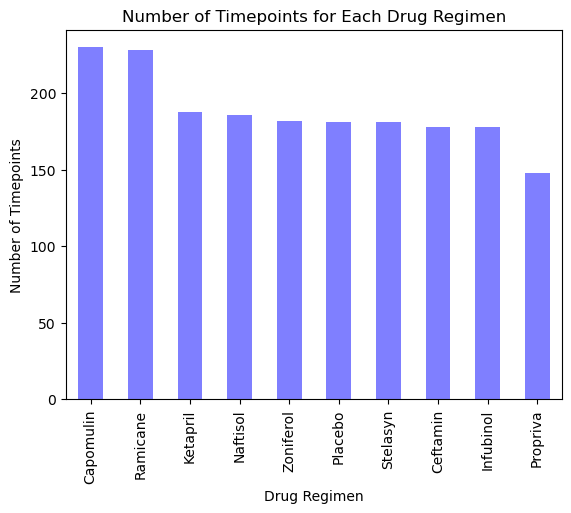

In [119]:
# a pandas dataframe bar plot sorted by the number of timepoints for each drug regimen
timepoint_count_sorted = timepoint_count.sort_values(ascending=False)
timepoint_count_sorted.plot(kind="bar", color="blue", alpha=0.5, align="center", width=0.5)
plt.title("Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()


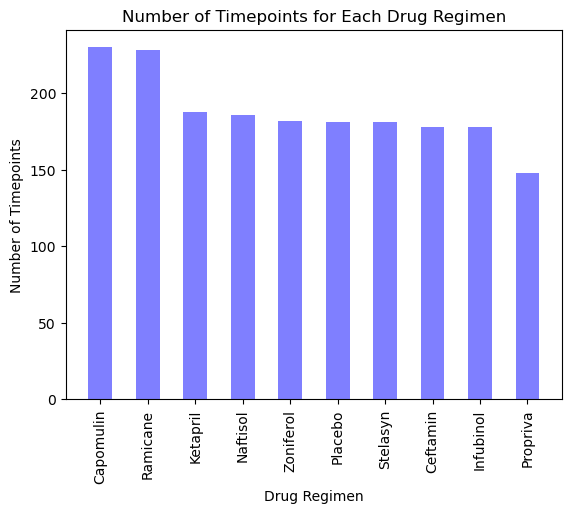

In [120]:
# a pyplot bar plot
plt.bar(timepoint_count_sorted.index, timepoint_count_sorted, color="blue", alpha=0.5, align="center", width=0.5)
plt.title("Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()


In [126]:
# a variable to count the number of male and female mice
sex_counts = clean_data['Sex'].value_counts()

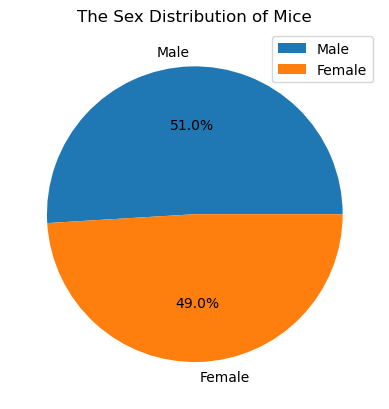

In [127]:
# a pandas pie chart to depict the sex distribution of the mice
sex_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("The Sex Distribution of Mice")
plt.ylabel("")
plt.legend()
plt.show()


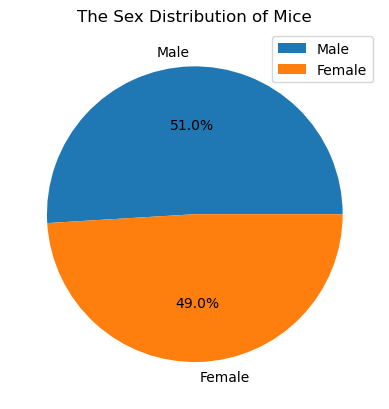

In [128]:
# a pyplot pie chart to depict the sex distribution of the mice
plt.pie(sex_counts.values, labels=sex_counts.index, autopct="%1.1f%%")
plt.title("The Sex Distribution of Mice")
plt.legend()
plt.show()

Quartiles, Outliers and Boxplots

In [131]:
# a dataframe of the last timepoint for each mouse
idx = clean_data.groupby("Mouse ID")["Timepoint"].idxmax()
last_timepoint_data = clean_data.loc[idx]

In [139]:
# reset the index of the last_timepoint_data DataFrame
last_timepoint_data = last_timepoint_data.reset_index(drop=True)
last_timepoint_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [143]:
# Capomulin, Ramicane, Infubinol, and Ceftamin are put into a list
four_drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [144]:
# an empty list to fill with tumor volume data
tumor_volume_data = []

In [145]:
# a for loop to append the tumor_volume_data list
for drug in four_drug_list:
    tumor_volume_data.append(last_timepoint_data.loc[last_timepoint_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"])


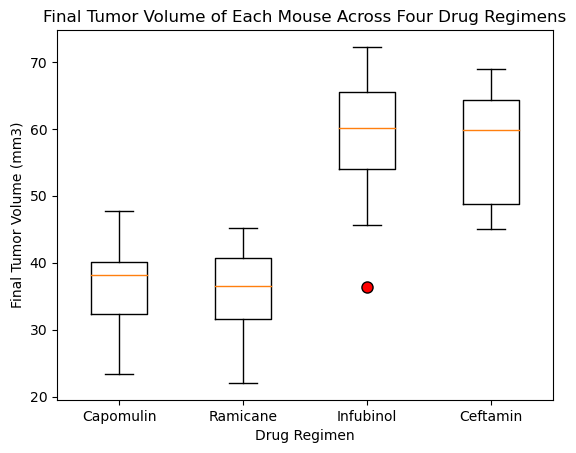

In [146]:
# a box plot to visualize the final tumor volume of each mouse across four drug regimens
plt.boxplot(tumor_volume_data, labels=four_drug_list, flierprops=dict(marker="o", markerfacecolor="red", markersize=8))
plt.title("Final Tumor Volume of Each Mouse Across Four Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [147]:
# filter the clean_data Dataframe on the Drug Regiment Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [149]:
# filter the clean_data Dataframe on the Mouse ID b128
mouse_b128_data = clean_data[clean_data["Mouse ID"] == "b128"]
mouse_b128_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


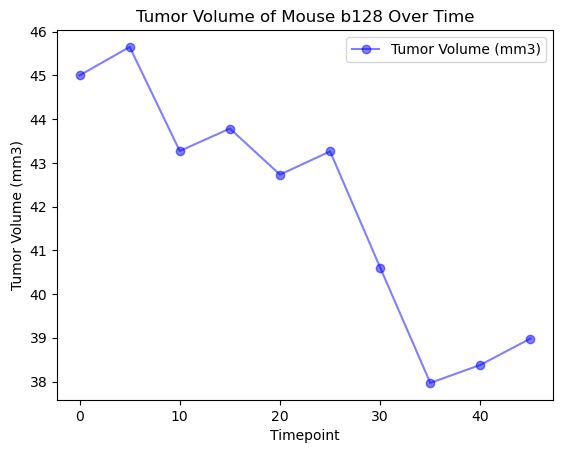

In [150]:
# a DataFrame and line chart to plot the tumor volume of mouse b128 over time
mouse_b128_data.plot(x="Timepoint", y="Tumor Volume (mm3)", marker="o", color="blue", alpha=0.5)
plt.title("Tumor Volume of Mouse b128 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()